In [1]:
import pandas as pd
from scipy import stats
from pyranges import PyRanges
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']
header_4 = ['Chromosome','Start', 'End', 'Type','Strain']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
#grch37_to_t2t = PyRanges(grch37_to_t2t)
''
grch37_to_t2t_types = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13_types.bed', sep='\t', names=header_4)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep='\t', names=header_3)
#grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_cnvrs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('../data/vst_cnvr_results_t2tchm13.csv')
t2t_all = PyRanges(t2t_all)
#t2t_all

t2t_all_values= pd.read_csv('vst_cnvr_candidates_chm13t2t.csv')
t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('vst_candidates_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)

grch37_all_values_all_cnvs = pd.read_csv('../data/vst_results_grch37.csv')
grch37_all_values_all_cnvs

t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
t2t_cnvs_values = PyRanges(t2t_cnvs_values)



grch37_cnvs_values= pd.read_csv('../data/grch37_cnvr_cnv_values.csv')
#grch37_cnvs_values = PyRanges(grch37_cnvs_values)

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

In [3]:
grch37_cnvs_values

,Chromosome,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
0,chr1,176101,176101,4.0,2.0,2.0,3.0,3.0,2.333333,3.0,...,3.0,1.0,3.0,1.000000,2.666667,4.0,1.666667,2.0,3.0,3.0
1,chr1,449901,449901,0.0,1.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,chr1,665601,665601,3.0,4.0,2.0,2.0,2.0,2.000000,2.0,...,4.0,3.0,4.5,3.333333,3.666667,3.0,4.000000,4.5,2.0,2.0
3,chr1,891701,891701,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,0.0,0.0,2.0,2.000000,2.000000,0.0,2.000000,0.0,0.0,0.0
4,chr1,1007801,1007801,0.0,2.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,2.000000,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,chr9,140136301,140136301,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0
7776,chr9,140197201,140197201,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0
7777,chr9,140245301,140245301,0.0,1.0,0.0,0.0,1.0,2.000000,0.0,...,2.0,0.0,2.0,1.000000,1.000000,0.0,2.000000,2.0,0.0,0.0
7778,chr9,140387601,140387601,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.5,4.0,2.0,4.000000,2.000000,4.0,2.000000,4.0,2.0,2.0


<h2> Differentiated CNVs with high Vst values (Old vs New assembly)

In [4]:
#### GRCh37 vst to T2T vst 
grch37_to_t2t = grch37_to_t2t.merge(grch37_to_t2t_types, on=['Chromosome','Start','End'])
grch37_to_t2t = PyRanges(grch37_to_t2t)
grch37_to_t2t 

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Start,End,Original,Strain_x,Type,Strain_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1
...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1


In [5]:
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all_values)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13


,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.18713,0.05719,0.14793,0.01534,0.00937,0.00508,0.04876,0.00374,0.02938,0
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.00440,0.18542,0.06628,0.01717,0.03727,0.00398,0.12549,0.03446,0.01565,0
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.01483,0.26664,0.29168,0.00462,0.11413,0.19075,0.12578,0.17145,0.01995,0
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.00379,0.00831,0.02420,0.02913,0.04484,0.07731,0.00066,0.00878,0.00662,0
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.42200,0.41269,0.30672,0.11283,0.10840,0.05292,0.00187,0.01845,0.01281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.00812,0.04673,0.32743,0.00642,0.03875,0.25943,0.08559,0.36245,0.20581,0
387,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.07222,0.05650,0.12527,0.00017,0.00015,0.01997,0.00067,0.01392,0.02299,0
393,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.04207,0.00067,0.00025,0.02714,0.00191,0.00124,0.05135,0.03528,0.00006,9
400,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.11735,0.08149,0.01141,0.06605,0.04394,0.00130,0.00464,0.04264,0.02783,0


In [6]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00937,0.00508,0.04876,0.00374,0.02938,0,chr1,9846202-9846201,9846201,9846201
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03727,0.00398,0.12549,0.03446,0.01565,0,chr1,62113302-62113301,62113301,62113301
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.11413,0.19075,0.12578,0.17145,0.01995,0,chr1,62654202-62654201,62654201,62654201
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.04484,0.07731,0.00066,0.00878,0.00662,0,chr1,94285702-94285701,94285701,94285701
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.10840,0.05292,0.00187,0.01845,0.01281,0,chr1,157173602-157173601,157173601,157173601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.03875,0.25943,0.08559,0.36245,0.20581,0,chr17,10889602-10889601,10889601,10889601
387,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.00015,0.01997,0.00067,0.01392,0.02299,0,chr17,58411202-58411201,58411201,58411201
393,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.00191,0.00124,0.05135,0.03528,0.00006,9,chr17,32872902-32872901,32872901,32872901
400,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.04394,0.00130,0.00464,0.04264,0.02783,0,chr18,38259802-38259801,38259801,38259801


In [7]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00196,0.01078,0.02217,0.00500,0.01737,0.01359,0.01488,0.04846,0.00036,0.05253
1,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.04532,0.01696,0.17710,0.06881,0.00591,0.05019,0.00484,0.08776,0.01740,0.01959
2,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62042086,62085609,0.16133,...,0.00717,0.01119,0.17826,0.30831,0.03315,0.10643,0.21625,0.26436,0.40776,0.02020
3,chr1,93665860,93665860,chr1:94285702-94285701,1,deletion,1,93661116,93671835,0.11423,...,0.00188,0.00828,0.01880,0.02989,0.01751,0.03487,0.05454,0.00215,0.00852,0.00344
4,chr1,156340662,156340662,chr1:157173602-157173601,1,deletion,1,156324576,156343901,0.07229,...,0.08286,0.32911,0.43280,0.29785,0.09879,0.17034,0.10230,0.00662,0.00079,0.01103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,chr17,10894560,10894560,chr17:10889602-10889601,1,deletion,1,10892408,10905466,0.00110,...,0.00100,0.00696,0.03578,0.32586,0.00244,0.02589,0.28010,0.01214,0.28587,0.15878
100,chr17,61202781,61202781,chr17:58411202-58411201,1,deletion,1,61184942,61222837,0.06683,...,0.02703,0.01113,0.00599,0.03815,0.00165,0.00750,0.00248,0.00124,0.00574,0.01597
101,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35500679,0.43513,...,0.00015,0.03792,0.00373,0.00060,0.02665,0.00530,0.00146,0.04994,0.02913,0.00098
102,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.01372,0.17226,0.11308,0.00914,0.06855,0.04185,0.00018,0.00660,0.06437,0.04433


In [8]:
## correlation
from itertools import combinations
regions = ['Africa', 'CentralAsiaSiberia', 'America','Oceania', 'WestEurasia', 'SouthAsia', 'EastAsia']
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_53058/563747644.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


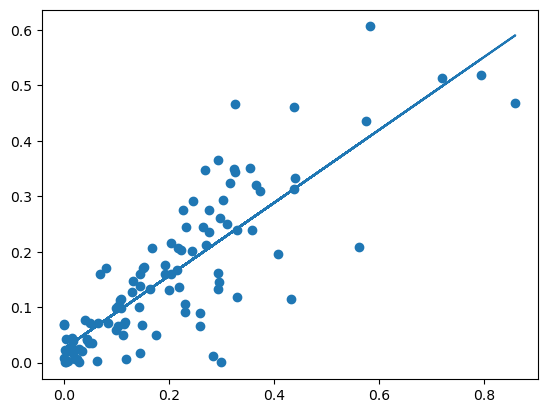

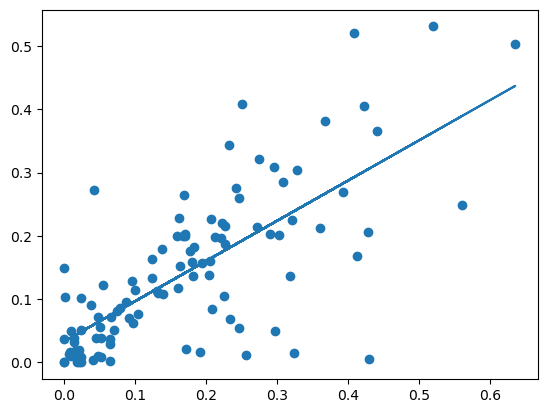

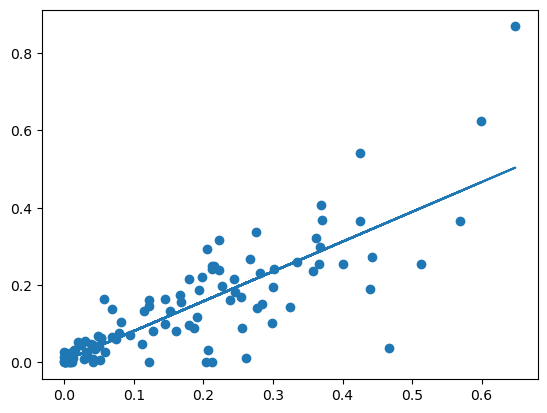

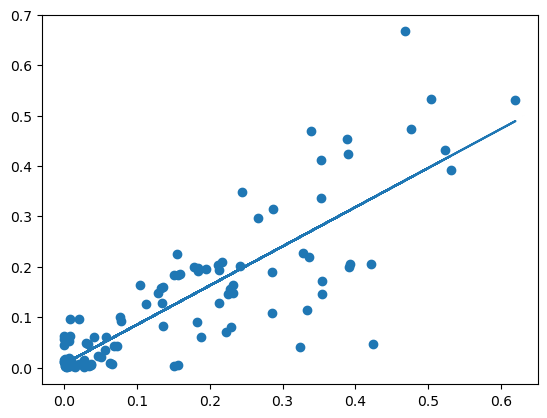

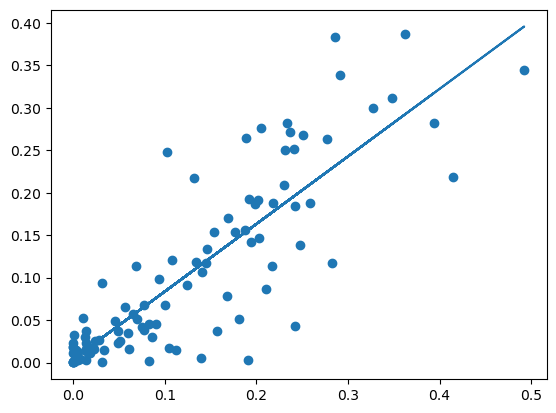

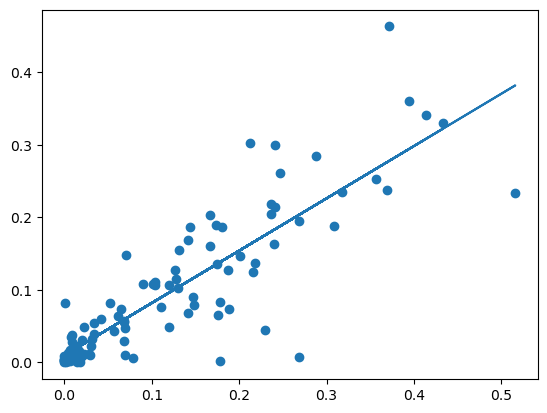

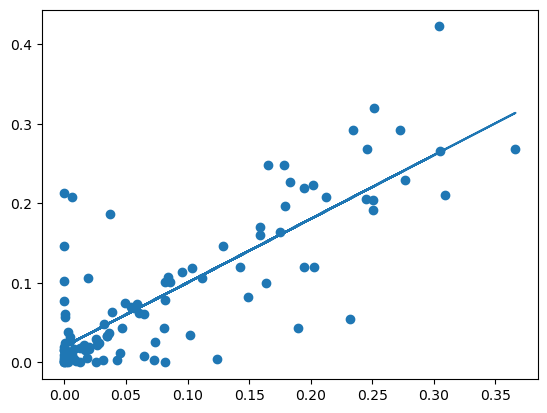

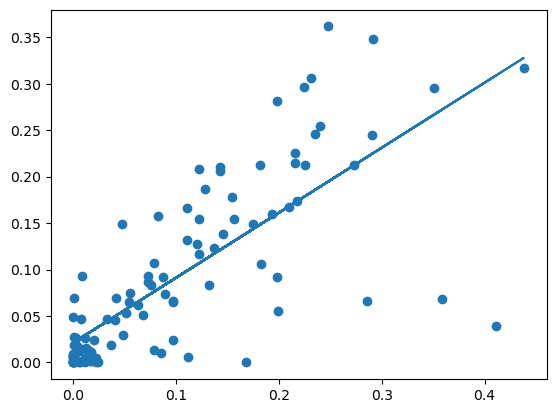

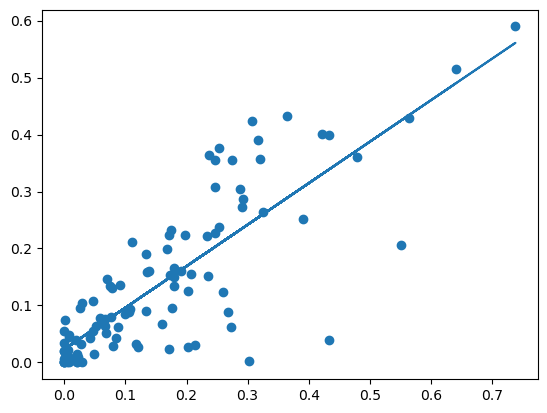

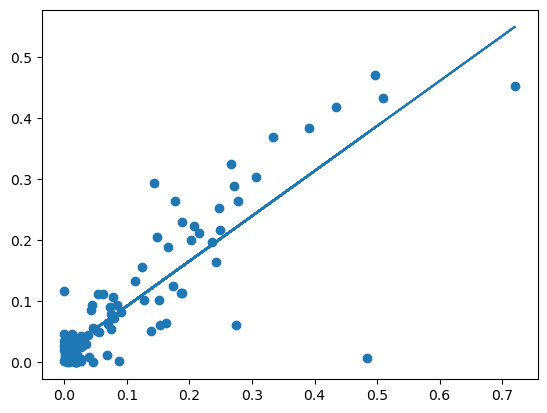

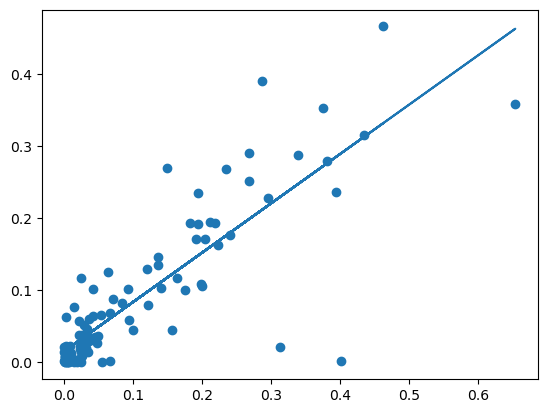

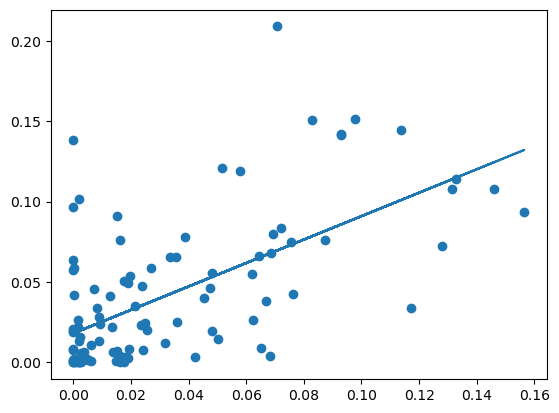

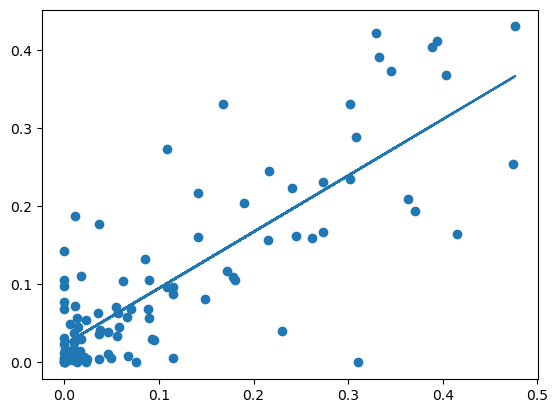

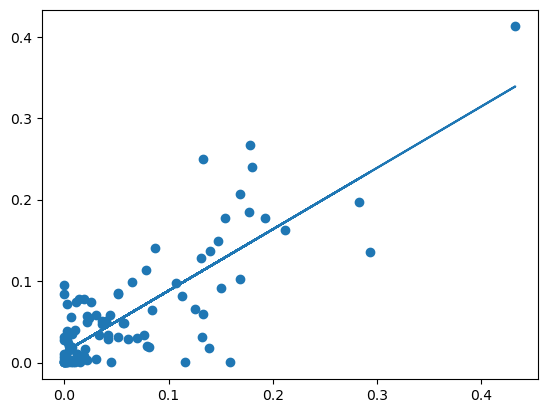

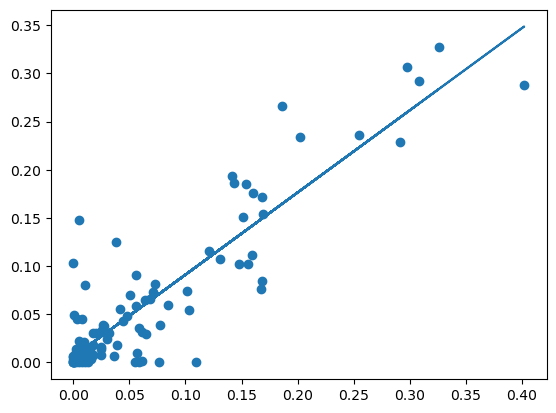

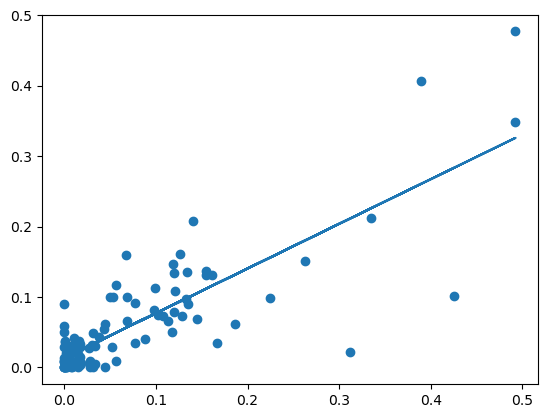

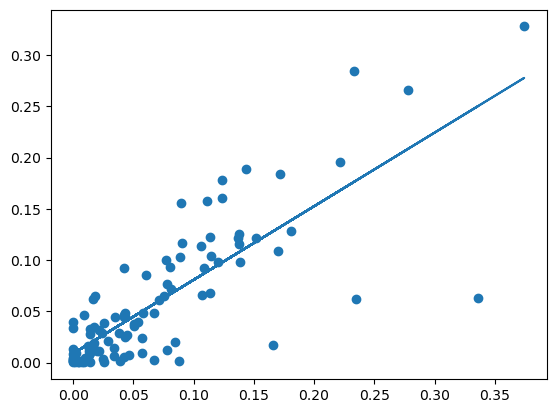

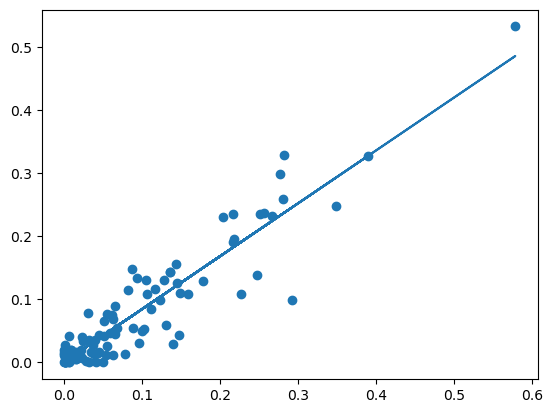

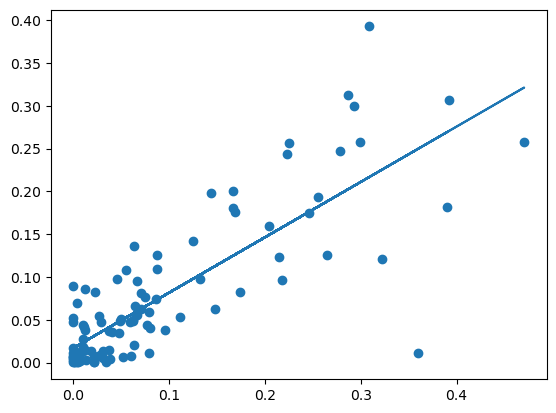

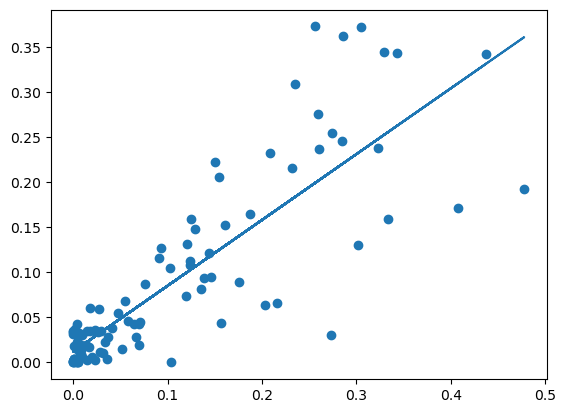

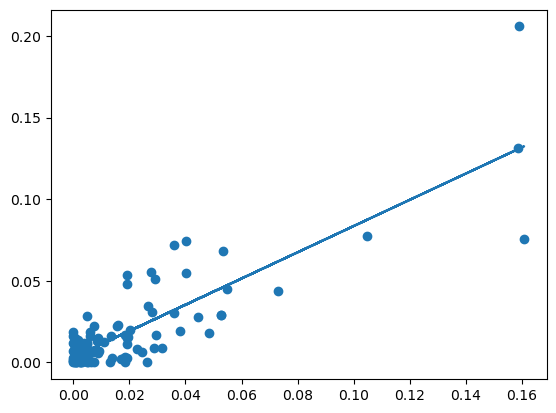

In [9]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    # fitting a linear regression line
    m, b = np.polyfit(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')], 1)

    # adding the regression line to the scatter plot
    plt.plot((vst_grch37[combination_names[i]+str('_y')]), m*(vst_grch37[combination_names[i]+str('_y')]) + b)

In [10]:
for i in range(21):
    print(combination_names[i])
    print(stats.spearmanr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    

Africa-America
SignificanceResult(statistic=0.8097250007129133, pvalue=2.359290074406186e-25)
Africa-CentralAsiaSiberia
SignificanceResult(statistic=0.6961276453624612, pvalue=2.3398450955015e-16)
Africa-EastAsia
SignificanceResult(statistic=0.8263093880912892, pvalue=3.518836355712144e-27)
Africa-Oceania
SignificanceResult(statistic=0.8059515186084986, pvalue=5.800623628374342e-25)
Africa-SouthAsia
SignificanceResult(statistic=0.844993933224421, pvalue=1.7441764142222023e-29)
Africa-WestEurasia
SignificanceResult(statistic=0.8465910758715388, pvalue=1.0728909143846333e-29)
America-CentralAsiaSiberia
SignificanceResult(statistic=0.6956963591428461, pvalue=2.4844324629751734e-16)
America-EastAsia
SignificanceResult(statistic=0.8034499365027561, pvalue=1.0418226720042718e-24)
America-Oceania
SignificanceResult(statistic=0.7989098196842194, pvalue=2.9522613846176525e-24)
America-SouthAsia
SignificanceResult(statistic=0.757201273654647, pvalue=1.405312727830282e-20)
America-WestEurasia
Sig

In [11]:
ls = []
for i in range(21):
    r = (stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    ls.append((combination_names[i], r.statistic , r.pvalue))
    

In [12]:
d = pd.DataFrame(ls)
d.columns = ['Populations', 'r', 'pvalue']
d.to_csv('../data/pcorrelation_differentiated_cnvs_assemblies.csv')

In [13]:
d['r'].mean()

0.819909024698391

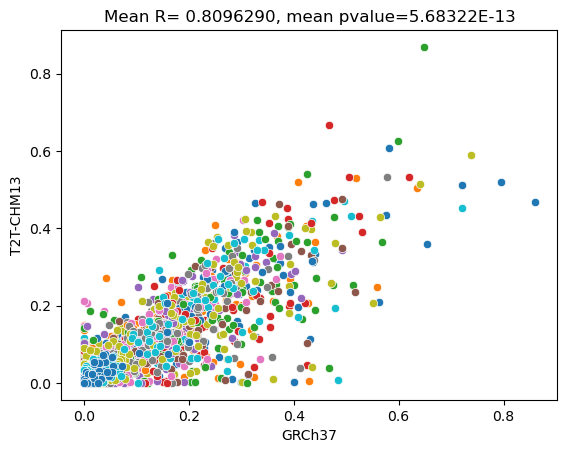

In [14]:
for i in range(21):
    #plt.figure() added for different figures
    #plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    
    ax =  sns.scatterplot(data=vst_grch37, x=str(combination_names[i]+str('_y')), y=str(combination_names[i]+str('_x')))
    ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
    #plt.xlabel("GRCh37")
    #plt.ylabel("T2T-CHM13")
    plt.title("Mean R= 0.8096290, mean pvalue=5.68322E-13")
    plt.savefig('../plots/vst_differentiated_pearson.png', transparent=True)
    
    

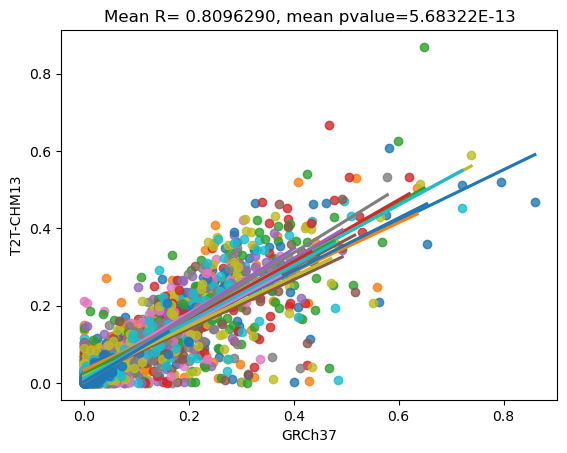

In [15]:
for i in range(21):
    #plt.figure() added for different figures
    #plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    
    ax =  sns.regplot(data=vst_grch37, x=str(combination_names[i]+str('_y')), y=str(combination_names[i]+str('_x')), ci=0)
    ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
    #plt.xlabel("GRCh37")
    #plt.ylabel("T2T-CHM13")
    plt.title("Mean R= 0.8096290, mean pvalue=5.68322E-13")
    #plt.savefig('../plots/vst_differentiated_pearson.png', transparent=True)
    
    

<h2> GRCh37 differentied with T2T-CHM13 differentied CNV values

In [16]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']
header_4 = ['Chromosome','Start', 'End', 'Type','Strain']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
#grch37_to_t2t = PyRanges(grch37_to_t2t)
''
grch37_to_t2t_types = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13_types.bed', sep='\t', names=header_4)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep='\t', names=header_3)
#grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_cnvrs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('../data/vst_cnvr_results_t2tchm13.csv')
t2t_all = PyRanges(t2t_all)
#t2t_all

t2t_all_values= pd.read_csv('vst_cnvr_candidates_chm13t2t.csv')
t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('vst_candidates_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)

grch37_all_values_all_cnvs = pd.read_csv('../data/vst_results_grch37.csv')
grch37_all_values_all_cnvs

t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
t2t_cnvs_values = PyRanges(t2t_cnvs_values)



grch37_cnvs_values= pd.read_csv('../data/grch37_cnvr_cnv_values.csv')
#grch37_cnvs_values = PyRanges(grch37_cnvs_values)

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

In [17]:
#### GRCh37 vst to T2T vst 
grch37_to_t2t = grch37_to_t2t.merge(grch37_to_t2t_types, on=['Chromosome','Start','End'])
grch37_to_t2t = PyRanges(grch37_to_t2t)

#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_cnvs_values)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]
grch37_to_t2tchm13

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,LP6005441-DNA_A01,...,LP6005677-DNA_E01,LP6005677-DNA_F01,LP6005677-DNA_G01,LP6007068-DNA_A01,LP6007069-DNA_A01,SS6004471,SS6004477,SS6004478,SS6004480,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,1.0,...,2.0,2.000000,2.0,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,2.0,...,2.0,2.000000,3.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,2.0,...,2.0,1.666667,1.0,1.166667,1.166667,1.285714,2.0,1.142857,1.666667,0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,2.0,...,2.0,2.000000,4.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,2.0,...,2.0,2.000000,2.0,2.000000,1.000000,2.000000,2.0,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,2.0,...,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,3.000000,0
403,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,2.0,...,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,0
404,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,4.0,...,2.0,5.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,5.000000,0
405,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,2.0,...,2.0,3.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,0


In [18]:
## Getting CNVs values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 


vst_grch37 = grch37_to_t2tchm13.merge(grch37_cnvs_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type,Strain_y,Start_b,End_b,LP6005441-DNA_A01_x,...,SS6004471_y,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477_y,SS6004478_y,SS6004479,SS6004480_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,1.0,...,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,2.0,...,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,2.0,...,2.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,2.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,2.0,...,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
255,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,2.0,...,13.0,8.0,10.0,10.0,11.0,4.5,12.0,9.0,8.0,7.0
256,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,4.0,...,2.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0
257,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,2.0,...,2.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0


In [19]:
vst_grch37 = vst_grch37.loc[:, [x for x in vst_grch37.columns if x.endswith(('x', 'y'))]]
vst_grch37 = vst_grch37.drop(columns=['Chromosome_x', 'Start_x', 'End_x', 'Chromosome_y', 'Start_y','End_y'])
vst_grch37

,Strain_x,Strain_y,LP6005441-DNA_A01_x,LP6005441-DNA_A03_x,LP6005441-DNA_A04_x,LP6005441-DNA_A05_x,LP6005441-DNA_A06_x,LP6005441-DNA_A08_x,LP6005441-DNA_A09_x,LP6005441-DNA_A10_x,...,LP6005677-DNA_D03_y,LP6005677-DNA_E01_y,LP6005677-DNA_F01_y,LP6005677-DNA_G01_y,LP6007068-DNA_A01_y,LP6007069-DNA_A01_y,SS6004471_y,SS6004477_y,SS6004478_y,SS6004480_y
0,1,1,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,1,1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1,1,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0
3,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
4,1,1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,10.0,9.0,9.0,8.0,9.0,10.0,13.0,12.0,9.0,7.0
256,1,1,4.0,5.0,2.0,5.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
257,1,1,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0


In [20]:
for i in range(len(names)):
    
    r = (stats.pearsonr(vst_grch37[names[i]+str('_y')],vst_grch37[names[i]+str('_x')])[0])
    if r > 0.4:
        print(names[i])
        print(r)

NameError: name 'names' is not defined

In [21]:
genome_browser = stats.pearsonr(vst_grch37['LP6005441-DNA_B10_y'],vst_grch37['LP6005441-DNA_B10_x'])
genome_browser

PearsonRResult(statistic=0.46685375522062017, pvalue=2.0045175083847723e-15)

Text(0, 0.5, 'T2T-CHM13')

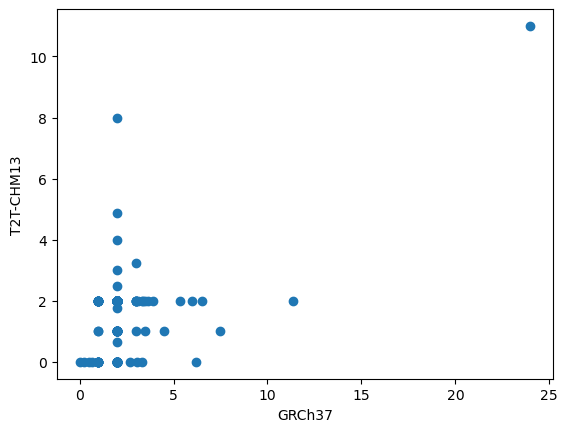

In [22]:
plt.scatter(vst_grch37['LP6005441-DNA_B10_x'],vst_grch37['LP6005441-DNA_B10_y'] )
plt.xlabel("GRCh37")
plt.ylabel("T2T-CHM13")
    
    
 ##### significant    

<h2> GRCh37 differentiated to all T2T cnvs 

In [23]:
#### GRCh37 vst to T2T all cnvs 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
#grch37_to_t2tchm13.sort_values(by='Distance').head(417)
grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance']<2000]
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.10530,0.08078,0.10348,0.01355,0.02573,0.00542,0.00152,0.00113,0.00558,0
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.18713,0.05719,0.14793,0.01534,0.00937,0.00508,0.04876,0.00374,0.02938,0
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01286,...,0.00881,0.01210,0.00408,0.00001,0.00032,0.00022,0.00020,0.00023,0.00086,0
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.03330,0.01304,0.00337,0.00751,0.00025,0.00127,0.00569,0.01057,0.00241,0
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.00440,0.18542,0.06628,0.01717,0.03727,0.00398,0.12549,0.03446,0.01565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.11735,0.08149,0.01141,0.06605,0.04394,0.00130,0.00464,0.04264,0.02783,0
403,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,0.00813,...,0.00000,0.00000,0.00792,0.00763,0.01030,0.00033,0.00000,0.00704,0.01000,0
404,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,0.00221,...,0.13965,0.00508,0.00810,0.08813,0.00005,0.00150,0.08772,0.05374,0.00097,0
405,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,0.00627,...,0.06119,0.00354,0.01155,0.06690,0.00452,0.01561,0.02945,0.01707,0.00227,0


In [24]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.02573,0.00542,0.00152,0.00113,0.00558,0,chr1,8360202-8360201,8360201,8360201
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00937,0.00508,0.04876,0.00374,0.02938,0,chr1,9846202-9846201,9846201,9846201
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01286,...,0.00032,0.00022,0.00020,0.00023,0.00086,0,chr1,16150402-16150401,16150401,16150401
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.00025,0.00127,0.00569,0.01057,0.00241,0,chr1,24377602-24377601,24377601,24377601
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.03727,0.00398,0.12549,0.03446,0.01565,0,chr1,62113302-62113301,62113301,62113301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.04394,0.00130,0.00464,0.04264,0.02783,0,chr18,38259802-38259801,38259801,38259801
403,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,0.00813,...,0.01030,0.00033,0.00000,0.00704,0.01000,0,chr18,44387502-44387501,44387501,44387501
404,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,0.00221,...,0.00005,0.00150,0.08772,0.05374,0.00097,0,chr18,52391202-52391201,52391201,52391201
405,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,0.00627,...,0.00452,0.01561,0.02945,0.01707,0.00227,0,chr18,64208602-64208601,64208601,64208601


In [25]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7828730,7845560,0.06454,...,0.20261,0.15949,0.19242,0.22741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9285874,9351410,0.23644,...,0.00196,0.01078,0.02217,0.00500,0.01737,0.01359,0.01488,0.04846,0.00036,0.05253
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1,15243923,15317676,0.01286,...,0.00097,0.28660,0.13966,0.10306,0.33966,0.18954,0.15444,0.02655,0.02565,0.00035
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1,23792853,23889404,0.01130,...,0.06285,0.38182,0.00497,0.01891,0.14607,0.03831,0.01258,0.30917,0.20186,0.00683
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61533762,0.32092,...,0.04532,0.01696,0.17710,0.06881,0.00591,0.05019,0.00484,0.08776,0.01740,0.01959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40856121,40883326,0.04220,...,0.01372,0.17226,0.11308,0.00914,0.06855,0.04185,0.00018,0.00660,0.06437,0.04433
267,chr18,46998195,46998195,chr18:44387502-44387501,1,duplication,1,46893620,47024991,0.00813,...,0.01891,0.00108,0.04083,0.01862,0.01371,0.10787,0.08012,0.05602,0.02811,0.00619
268,chr18,54927078,54927078,chr18:52391202-52391201,1,deletion,1,54920591,54956719,0.00221,...,0.00000,0.21078,0.02163,0.02458,0.24898,0.02842,0.03482,0.18389,0.10898,0.00947
269,chr18,66739381,66739381,chr18:64208602-64208601,1,deletion,1,66716038,66832385,0.00627,...,0.00234,0.31074,0.15916,0.05869,0.31183,0.16626,0.06266,0.03365,0.10326,0.02633


/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_53058/2136663405.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


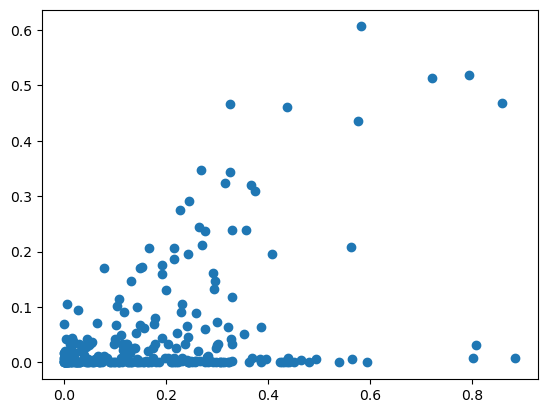

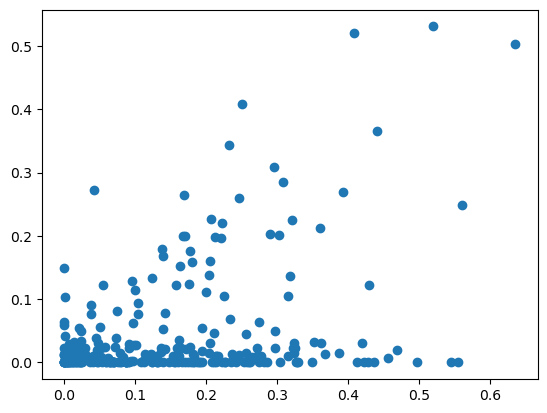

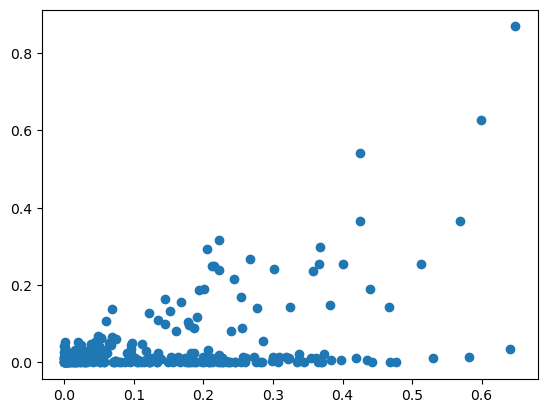

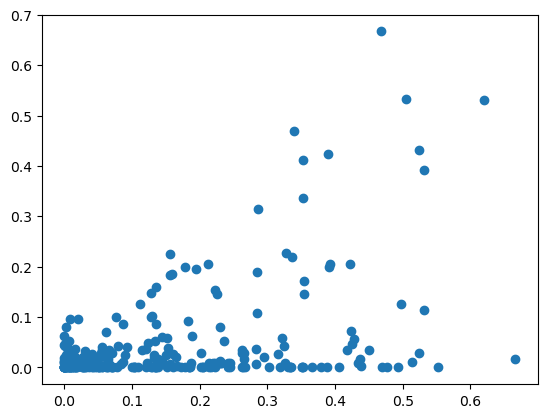

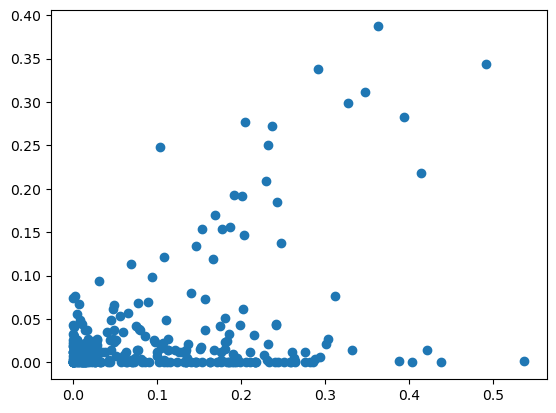

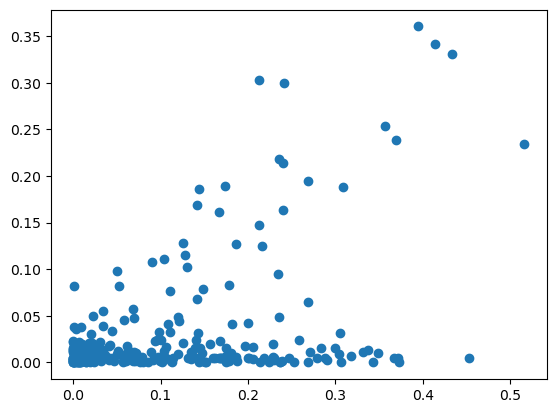

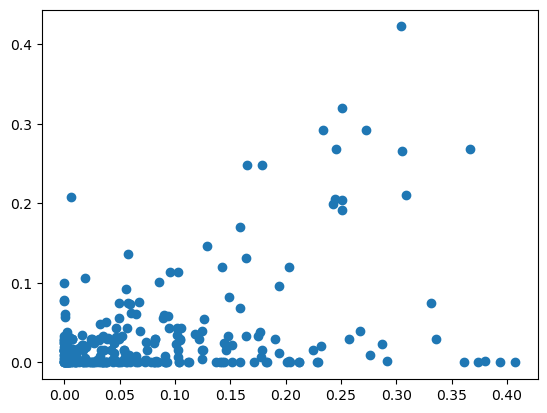

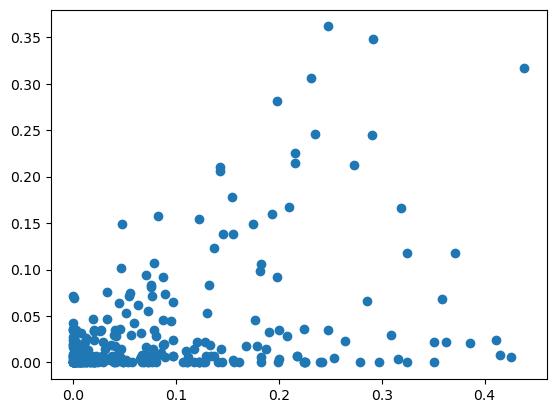

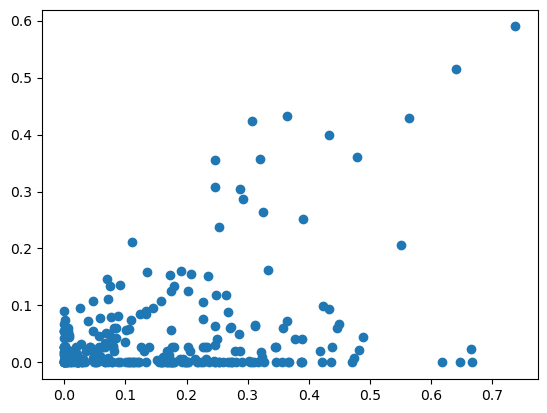

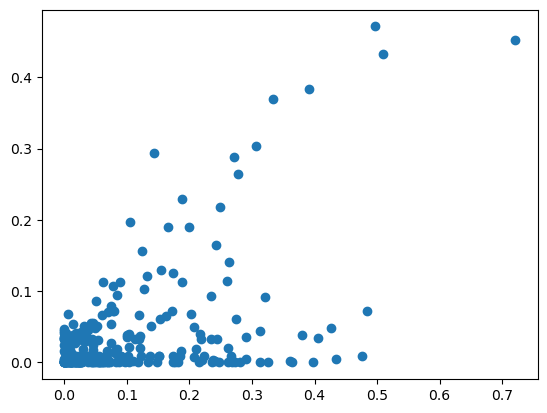

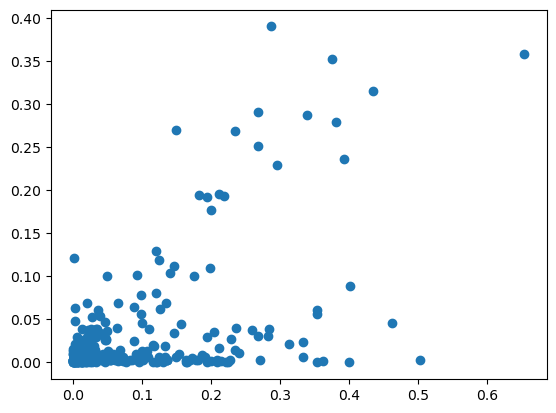

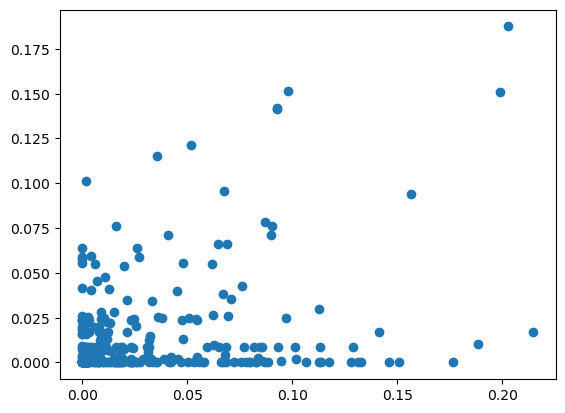

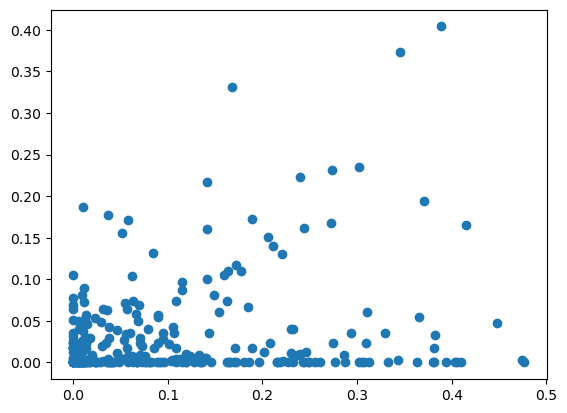

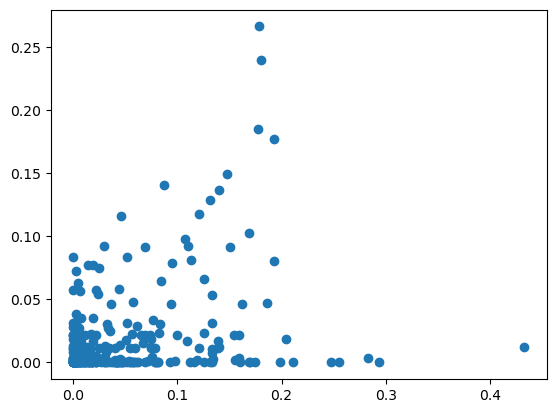

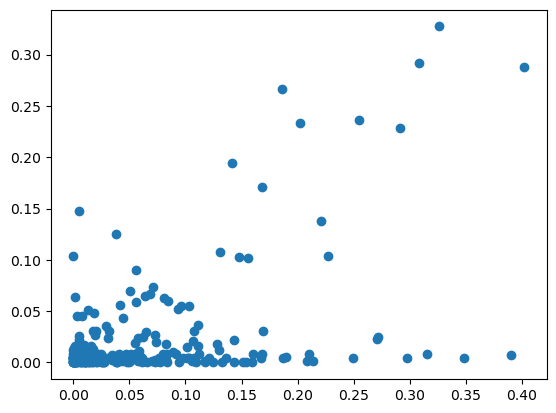

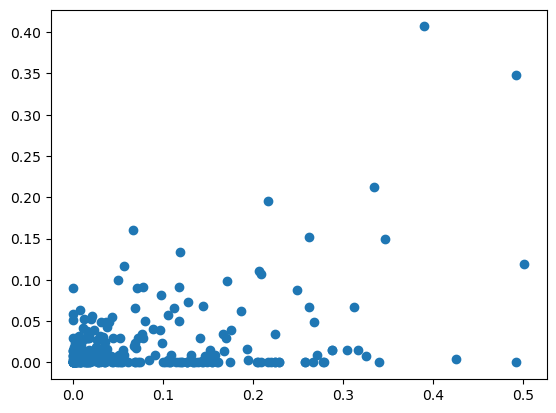

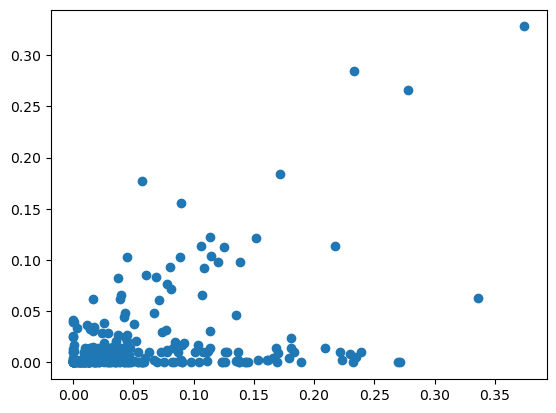

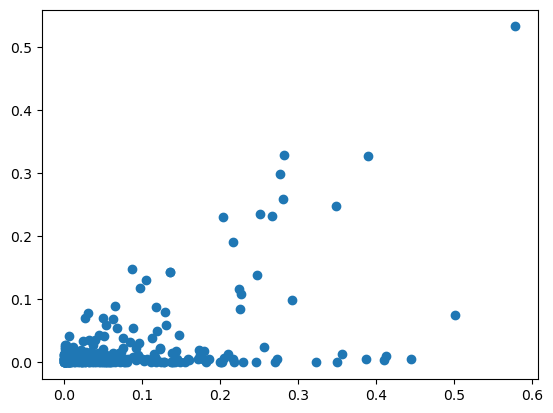

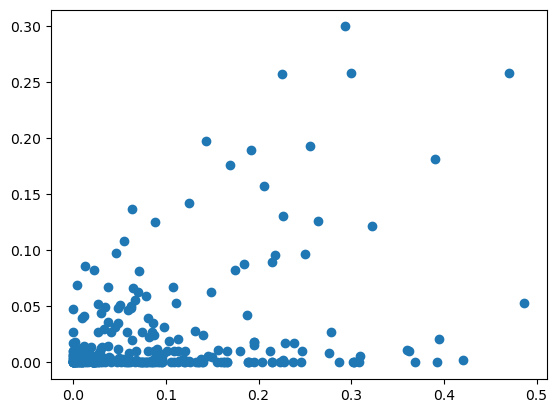

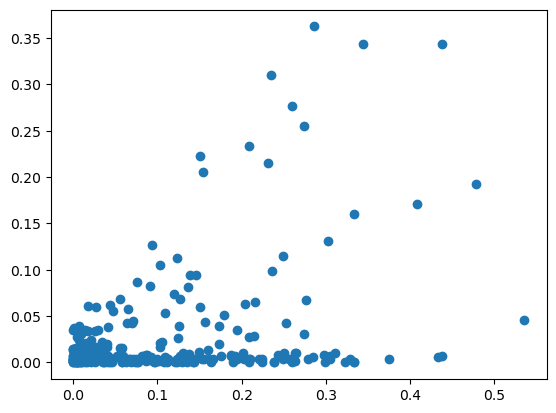

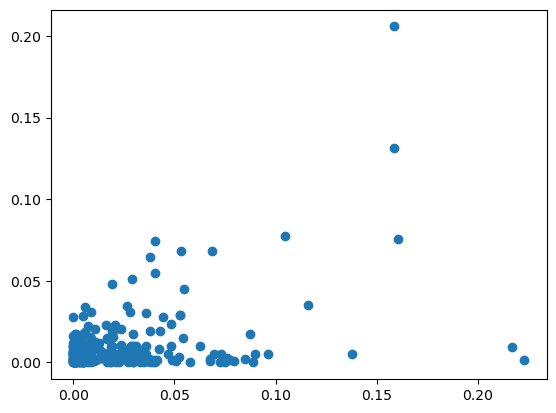

In [26]:
for i in range(21):
    plt.figure()
    plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

In [27]:
for i in range(21):
    print(combination_names[i])
    print(stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))


Africa-America
PearsonRResult(statistic=0.44391135062921877, pvalue=1.6335588392319012e-14)
Africa-CentralAsiaSiberia
PearsonRResult(statistic=0.3831044689518292, pvalue=6.651747627429729e-11)
Africa-EastAsia
PearsonRResult(statistic=0.46420663950654906, pvalue=6.885838073917401e-16)
Africa-Oceania
PearsonRResult(statistic=0.4435364311119961, pvalue=1.728577162537123e-14)
Africa-SouthAsia
PearsonRResult(statistic=0.38575631536462957, pvalue=4.789880038523126e-11)
Africa-WestEurasia
PearsonRResult(statistic=0.4446269244818373, pvalue=1.4661789910712643e-14)
America-CentralAsiaSiberia
PearsonRResult(statistic=0.4193495329004874, pvalue=5.746825755438313e-13)
America-EastAsia
PearsonRResult(statistic=0.4052045364866361, pvalue=3.9318265323943596e-12)
America-Oceania
PearsonRResult(statistic=0.3762231491595035, pvalue=1.5384010313819308e-10)
America-SouthAsia
PearsonRResult(statistic=0.5209504917409431, pvalue=2.960082499123805e-20)
America-WestEurasia
PearsonRResult(statistic=0.5436786286

<h2> GRCh37 all CNVs to T2T all CNVs 

In [28]:
#### GRCh37 all CNVs to T2T all CNVs 


grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13  =grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2]
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,...,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00000,0.00000,0.00000,...,0.02396,0.00000,0.00000,0.02920,0.00000,0.00000,0.02754,0.03319,0.00000,0
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.03687,0.00708,0.02735,0.01018,0.03930,0.01047,0.01020,0.00005,0.01068,0
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.03687,0.00708,0.02735,0.01018,0.03930,0.01047,0.01020,0.00005,0.01068,0
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00460,0.08919,0.00427,...,0.05087,0.14541,0.08076,0.00000,0.01790,0.00428,0.01710,0.00329,0.00379,0
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00460,0.08919,0.00427,...,0.05087,0.14541,0.08076,0.00000,0.01790,0.00428,0.01710,0.00329,0.00379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
7180,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,0.02523,0.00000,0.01460,...,0.00412,0.05330,0.00000,0.00354,0.02427,0.00955,0.03490,0.00204,0.03225,0
7181,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,0.00456,0.00134,0.00298,...,0.00027,0.00094,0.02711,0.00000,0.00234,0.02768,0.00218,0.03319,0.01730,0
7182,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,0.03417,0.00000,0.02169,...,0.00000,0.02256,0.00392,0.01549,0.00036,0.00869,0.02052,0.00348,0.01261,0


In [29]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.02754,0.03319,0.00000,0,chr1,1007802-1007801,1007801,1007801
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.03930,0.01047,0.01020,0.00005,0.01068,0,chr1,1049402-1049401,1049401,1049401
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.03930,0.01047,0.01020,0.00005,0.01068,0,chr1,1085102-1085101,1085101,1085101
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00460,0.08919,0.00427,...,0.01790,0.00428,0.01710,0.00329,0.00379,0,chr1,1234302-1234301,1234301,1234301
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00460,0.08919,0.00427,...,0.01790,0.00428,0.01710,0.00329,0.00379,0,chr1,1242902-1242901,1242901,1242901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr18,71800302-71800301,71800301,71800301
7180,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,0.02523,0.00000,0.01460,...,0.02427,0.00955,0.03490,0.00204,0.03225,0,chr18,72407002-72407001,72407001,72407001
7181,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,0.00456,0.00134,0.00298,...,0.00234,0.02768,0.00218,0.03319,0.01730,0,chr18,72607202-72607201,72607201,72607201
7182,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,0.03417,0.00000,0.02169,...,0.00036,0.00869,0.02052,0.00348,0.01261,0,chr18,72914202-72914201,72914201,72914201


In [30]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values_all_cnvs, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain,Start_b,End_b,Africa-America_x,Africa-CentralAsiaSiberia_x,Africa-EastAsia_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,0.00000,0.00000,0.00000,...,0.00815,0.01245,0.02210,0.00802,0.00016,0.00272,0.00008,0.00147,0.00001,0.00168
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,0.07067,0.00864,0.03664,...,0.01164,0.04786,0.00107,0.00863,0.01823,0.01922,0.00027,0.06119,0.01087,0.01417
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,0.07067,0.00864,0.03664,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,0.00460,0.08919,0.00427,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,0.00460,0.08919,0.00427,...,0.00000,0.02250,0.01065,0.00374,0.02778,0.01404,0.00534,0.01018,0.00721,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,0.03417,0.00000,0.00000,...,0.00000,0.00000,0.01065,0.00374,0.00000,0.01404,0.00534,0.00993,0.00342,0.00185
4659,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,0.02523,0.00000,0.01460,...,0.00000,0.00000,0.01065,0.00374,0.00000,0.01404,0.00534,0.00993,0.00342,0.00185
4660,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,0.00456,0.00134,0.00298,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4661,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,0.03417,0.00000,0.02169,...,0.00815,0.04592,0.00000,0.00374,0.02084,0.01009,0.00001,0.05328,0.01727,0.00481


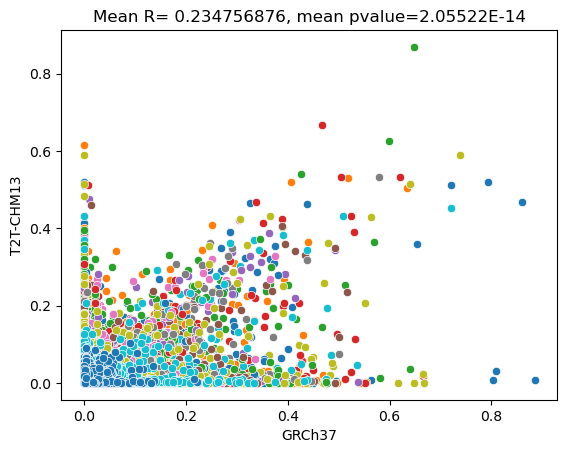

In [31]:
for i in range(21):
    #plt.figure() added for different figures
    #plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

    ax =  sns.scatterplot(data=vst_grch37, x=str(combination_names[i]+str('_y')), y=str(combination_names[i]+str('_x')))
    
    ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
    plt.title("Mean R= 0.234756876, mean pvalue=2.05522E-14")
    plt.savefig('../plots/vst_all_pearson.png', transparent=True)
    
    
 ##### significant    

In [32]:
ls = []
for i in range(21):
    r = (stats.pearsonr(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] ))
    ls.append((combination_names[i], r.statistic , r.pvalue))

In [33]:
d = pd.DataFrame(ls)
d.columns = ['Populations', 'r', 'pvalue']
d.to_csv('../data/pcorrelation_all_cnvs_assemblies.csv')

In [34]:
d['r'].mean()

0.27141323315947996

<h2> GRCh37 all CNVs to T2T all CNVs (CNV_values)

In [35]:
#### GRCh37 all CNVs to T2T all CNVs 


grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t_cnvs_values)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13  =grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]
grch37_to_t2tchm13



,Chromosome,Start,End,Original,Strain,Start_b,End_b,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,...,LP6005677-DNA_E01,LP6005677-DNA_F01,LP6005677-DNA_G01,LP6007068-DNA_A01,LP6007069-DNA_A01,SS6004471,SS6004477,SS6004478,SS6004480,Distance
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,3.0,2.0,2.0,...,2.0,3.0,2.0,1.800000,2.000,1.800000,3.00,2.00,2.200000,0
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,1.0,2.0,1.0,...,1.0,2.0,1.0,2.210526,2.125,1.909091,1.75,2.15,2.058824,0
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,1.0,2.0,1.0,...,1.0,2.0,1.0,2.210526,2.125,1.909091,1.75,2.15,2.058824,0
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,2.0,2.0,2.0,...,2.0,2.0,3.0,2.000000,2.000,2.000000,2.00,2.00,2.000000,0
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,2.0,2.0,2.0,...,2.0,2.0,3.0,2.000000,2.000,2.000000,2.00,2.00,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,2.0,2.0,2.0,...,2.0,3.0,2.0,2.000000,2.000,2.000000,2.00,2.00,2.000000,0
7190,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,2.0,2.0,2.0,...,2.0,2.0,3.0,2.000000,2.000,3.000000,2.00,3.00,2.000000,0
7191,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,2.0,2.0,2.0,...,2.0,2.0,2.0,2.000000,2.000,2.000000,2.00,2.00,2.000000,0
7192,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,2.0,2.0,2.0,...,2.0,2.0,2.0,2.000000,2.000,2.000000,2.00,2.00,2.000000,0


In [36]:
## Getting CNVs values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 


vst_grch37 = grch37_to_t2tchm13.merge(grch37_cnvs_values, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain,Start_b,End_b,LP6005441-DNA_A01_x,LP6005441-DNA_A03_x,LP6005441-DNA_A04_x,...,SS6004471_y,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477_y,SS6004478_y,SS6004479,SS6004480_y
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4913,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4914,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4915,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,2.0,2.0,2.0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0


In [37]:
vst_grch37 = vst_grch37.loc[:, [x for x in vst_grch37.columns if x.endswith(('x', 'y'))]]
vst_grch37 = vst_grch37.drop(columns=['Chromosome_x', 'Start_x', 'End_x', 'Chromosome_y', 'Start_y','End_y'])
vst_grch37

,LP6005441-DNA_A01_x,LP6005441-DNA_A03_x,LP6005441-DNA_A04_x,LP6005441-DNA_A05_x,LP6005441-DNA_A06_x,LP6005441-DNA_A08_x,LP6005441-DNA_A09_x,LP6005441-DNA_A10_x,LP6005441-DNA_A11_x,LP6005441-DNA_A12_x,...,LP6005677-DNA_D03_y,LP6005677-DNA_E01_y,LP6005677-DNA_F01_y,LP6005677-DNA_G01_y,LP6007068-DNA_A01_y,LP6007069-DNA_A01_y,SS6004471_y,SS6004477_y,SS6004478_y,SS6004480_y
0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0
1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4913,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4914,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4915,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0


In [38]:
individuals = vst_grch37.columns[0:265]
names = [s.replace('_x', '') for s in individuals] # remove all the 8
names

['LP6005441-DNA_A01',
 'LP6005441-DNA_A03',
 'LP6005441-DNA_A04',
 'LP6005441-DNA_A05',
 'LP6005441-DNA_A06',
 'LP6005441-DNA_A08',
 'LP6005441-DNA_A09',
 'LP6005441-DNA_A10',
 'LP6005441-DNA_A11',
 'LP6005441-DNA_A12',
 'LP6005441-DNA_B01',
 'LP6005441-DNA_B02',
 'LP6005441-DNA_B04',
 'LP6005441-DNA_B05',
 'LP6005441-DNA_B06',
 'LP6005441-DNA_B07',
 'LP6005441-DNA_B08',
 'LP6005441-DNA_B09',
 'LP6005441-DNA_B10',
 'LP6005441-DNA_B11',
 'LP6005441-DNA_B12',
 'LP6005441-DNA_C02',
 'LP6005441-DNA_C03',
 'LP6005441-DNA_C05',
 'LP6005441-DNA_C06',
 'LP6005441-DNA_C07',
 'LP6005441-DNA_C08',
 'LP6005441-DNA_C09',
 'LP6005441-DNA_C10',
 'LP6005441-DNA_C11',
 'LP6005441-DNA_D01',
 'LP6005441-DNA_D02',
 'LP6005441-DNA_D03',
 'LP6005441-DNA_D05',
 'LP6005441-DNA_D06',
 'LP6005441-DNA_D07',
 'LP6005441-DNA_D08',
 'LP6005441-DNA_D09',
 'LP6005441-DNA_D10',
 'LP6005441-DNA_D11',
 'LP6005441-DNA_D12',
 'LP6005441-DNA_E02',
 'LP6005441-DNA_E03',
 'LP6005441-DNA_E05',
 'LP6005441-DNA_E06',
 'LP600544

In [39]:
for i in range(len(names)):
    print(names[i])
    r = (stats.pearsonr(vst_grch37[names[i]+str('_y')],vst_grch37[names[i]+str('_x')])[0])
    if r > 0.5:
        print(r)

LP6005441-DNA_A01
LP6005441-DNA_A03
LP6005441-DNA_A04
LP6005441-DNA_A05
LP6005441-DNA_A06
LP6005441-DNA_A08
LP6005441-DNA_A09
LP6005441-DNA_A10
LP6005441-DNA_A11
LP6005441-DNA_A12
LP6005441-DNA_B01
LP6005441-DNA_B02
LP6005441-DNA_B04
LP6005441-DNA_B05
LP6005441-DNA_B06
LP6005441-DNA_B07
LP6005441-DNA_B08
LP6005441-DNA_B09
LP6005441-DNA_B10
LP6005441-DNA_B11
LP6005441-DNA_B12
LP6005441-DNA_C02
LP6005441-DNA_C03
LP6005441-DNA_C05
LP6005441-DNA_C06
LP6005441-DNA_C07
LP6005441-DNA_C08
LP6005441-DNA_C09
LP6005441-DNA_C10
LP6005441-DNA_C11
LP6005441-DNA_D01
LP6005441-DNA_D02
LP6005441-DNA_D03
LP6005441-DNA_D05
LP6005441-DNA_D06
LP6005441-DNA_D07
LP6005441-DNA_D08
LP6005441-DNA_D09
LP6005441-DNA_D10
LP6005441-DNA_D11
LP6005441-DNA_D12
LP6005441-DNA_E02
LP6005441-DNA_E03
LP6005441-DNA_E05
LP6005441-DNA_E06
LP6005441-DNA_E07
LP6005441-DNA_E08
LP6005441-DNA_E09
LP6005441-DNA_E10
LP6005441-DNA_F01
LP6005441-DNA_F02
LP6005441-DNA_F03
LP6005441-DNA_F04
LP6005441-DNA_F05
LP6005441-DNA_F06
LP6005441-

In [40]:
genome_browser_all = stats.pearsonr(vst_grch37['LP6005441-DNA_B10_x'],vst_grch37['LP6005441-DNA_B10_y'])
genome_browser_all

PearsonRResult(statistic=0.045557858412328636, pvalue=0.0014296862854610696)

In [41]:
vst_grch37['LP6005441-DNA_A01_y']

0       0.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
4912    2.0
4913    2.0
4914    2.0
4915    2.0
4916    2.0
Name: LP6005441-DNA_A01_y, Length: 4896, dtype: float64

Text(0, 0.5, 'T2T-CHM13')

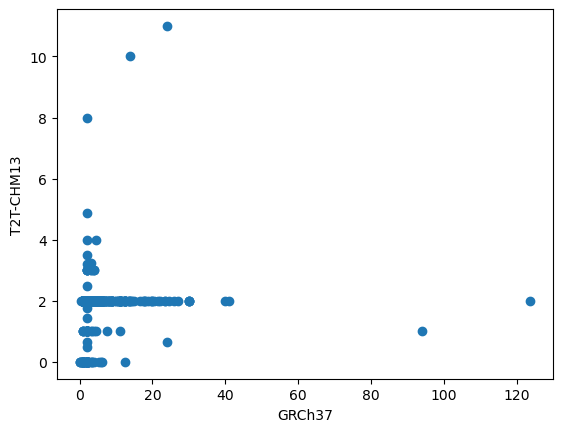

In [42]:
plt.scatter(vst_grch37['LP6005441-DNA_B10_x'],vst_grch37['LP6005441-DNA_B10_y'] )
plt.xlabel("GRCh37")
plt.ylabel("T2T-CHM13")
    
    
 ##### significant    

In [43]:
t2t_cnvs_values

,Chromosome,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,LP6005677-DNA_D03,LP6005677-DNA_E01,LP6005677-DNA_F01,LP6005677-DNA_G01,LP6007068-DNA_A01,LP6007069-DNA_A01,SS6004471,SS6004477,SS6004478,SS6004480
0,chr1,436980,452948,2.0,6.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0
1,chr1,453948,466894,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
2,chr1,472779,484339,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,chr1,485339,511499,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,chr1,518975,605035,2.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173246,chr18,76275159,76278412,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
173247,chr18,76280220,76283528,2.0,2.0,3.0,2.0,3.0,2.0,2.0,...,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
173248,chr18,76284798,76302290,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
173249,chr18,76304864,76328399,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0


In [44]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values_all_cnvs, left_on=['Start_old','End_old'], right_on=['Start','End'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome_x,Start_x,End_x,Original,Strain,Start_b,End_b,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,502515,502515,chr1:1007802-1007801,1,485339,511499,3.0,2.0,2.0,...,0.00815,0.01245,0.02210,0.00802,0.00016,0.00272,0.00008,0.00147,0.00001,0.00168
1,chr1,542636,542636,chr1:1049402-1049401,1,518975,605035,1.0,2.0,1.0,...,0.01164,0.04786,0.00107,0.00863,0.01823,0.01922,0.00027,0.06119,0.01087,0.01417
2,chr1,578336,578336,chr1:1085102-1085101,1,518975,605035,1.0,2.0,1.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,chr1,730467,730467,chr1:1234302-1234301,1,700181,782637,2.0,2.0,2.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,chr1,739070,739070,chr1:1242902-1242901,1,700181,782637,2.0,2.0,2.0,...,0.00000,0.02250,0.01065,0.00374,0.02778,0.01404,0.00534,0.01018,0.00721,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,chr18,74354032,74354032,chr18:71800302-71800301,1,74352844,74391979,2.0,2.0,2.0,...,0.00000,0.00000,0.01065,0.00374,0.00000,0.01404,0.00534,0.00993,0.00342,0.00185
4913,chr18,74924414,74924414,chr18:72407002-72407001,1,74911148,74942050,2.0,2.0,2.0,...,0.00000,0.00000,0.01065,0.00374,0.00000,0.01404,0.00534,0.00993,0.00342,0.00185
4914,chr18,75124641,75124641,chr18:72607202-72607201,1,75087093,75139789,2.0,2.0,2.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4915,chr18,75431640,75431640,chr18:72914202-72914201,1,75427252,75500588,2.0,2.0,2.0,...,0.00815,0.04592,0.00000,0.00374,0.02084,0.01009,0.00001,0.05328,0.01727,0.00481


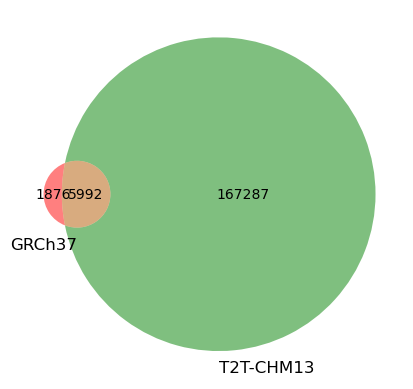

In [45]:
from matplotlib_venn import venn2
## Total T2T-CHM13 173251
## Total GRCh37 7840
## Shared 5964
# Use the venn2 function
venn2(subsets = (1876,167287,5992), set_labels = ('GRCh37', 'T2T-CHM13'), alpha = 0.5)
plt.show()

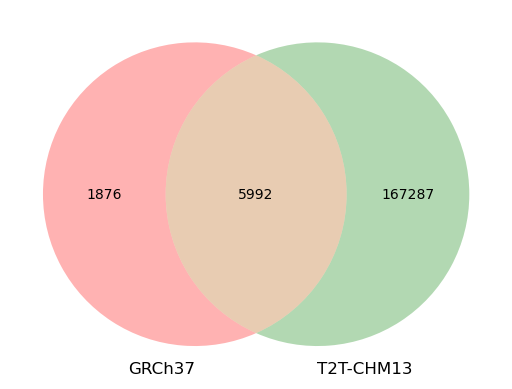

In [46]:
from matplotlib_venn import venn2_unweighted
venn2_unweighted(subsets = (1876,167287,5992), set_labels = ('GRCh37', 'T2T-CHM13'), alpha = 0.3)
plt.show()

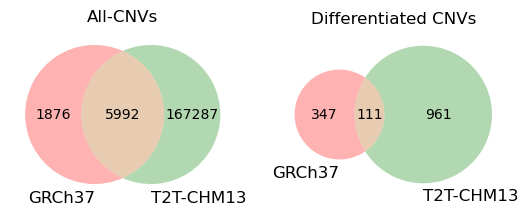

In [47]:
from matplotlib import pyplot as plt
import numpy as np


plt.subplot(1, 2, 1) # row 1, col 2 index 1
venn2_unweighted(subsets = (1876,167287,5992), set_labels = ('GRCh37', 'T2T-CHM13'), alpha = 0.3)
plt.title("All-CNVs")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
venn2(subsets = (347,961,111), set_labels = ('GRCh37', 'T2T-CHM13'), alpha = 0.3)
plt.title("Differentiated CNVs")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.savefig('../plots/venn_diagram_shared_cnvs_among_assemblies.png', transparent=True)

# Using liftover with 0.95 of min map 

T2T = [1037,452]
GRCH37 = [35, 6]
input_chi = pd.DataFrame([T2T, GRCH37])
input_chi.columns = ['T2T_to_GRCh37', 'GRCh37_to_T2T']
input_chi.index = ['Converted', 'No converted']
input_chi

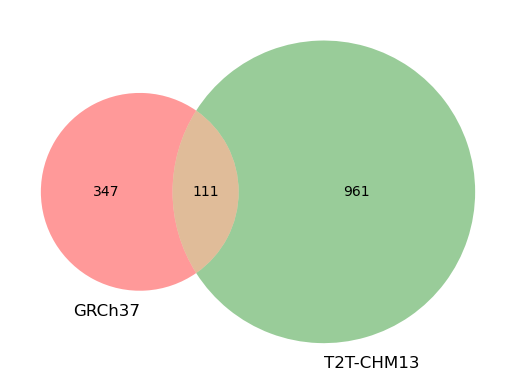

In [48]:
from matplotlib_venn import venn2
## Total T2T-CHM13 173251
## Total GRCh37 7840
## Shared 5964
# Use the venn2 function
venn2(subsets = (347,961,111), set_labels = ('GRCh37', 'T2T-CHM13'))
plt.show()

In [51]:
#### GRCh37 to T2T
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(275)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,9328929,9328929,chr1:9846202-9846201,1,9285874,9351410,0.23644,0
4748,chr10,57583132,57583132,chr10:58492502-58492501,1,57583009,57717531,0.14049,0
1391,chr3,192834804,192834804,chr3:189736202-189736201,1,192833895,192842357,0.20527,0
1390,chr3,192462292,192462292,chr3:189363402-189363401,1,192439673,192500670,0.03469,0
1389,chr3,172950888,172950888,chr3:169884002-169884001,1,172920295,173021202,0.02121,0
...,...,...,...,...,...,...,...,...,...
6793,chr16,85901375,85901375,chr16:79874502-79874501,1,85901895,85963351,0.06640,521
4986,chr10,83239737,83239737,chr10:84125602-84125601,1,83240324,83243664,0.13277,588
3663,chr7,31411674,31411674,chr7:31313602-31313601,1,31412315,31422724,0.09874,642
562,chr1,219421435,219421435,chr1:220355502-220355501,1,219422081,219436625,0.22364,647


In [52]:
grch37_to_t2tchm13 = t2t.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13.sort_values(by='Distance').head(336)

,Chromosome,Start,End,Type,Start_b,End_b,Original,Strain,Distance
0,chr1,9285874,9351410,0.23644,9328929,9328929,chr1:9846202-9846201,1,0
836,chr14,67732433,67824393,0.00041,67736804,67736804,chr14:73996002-73996001,1,0
837,chr14,67847497,67932651,0.07399,67877026,67877026,chr14:74136202-74136201,1,0
838,chr14,68060409,68101584,0.06662,68064545,68064545,chr14:74323602-74323601,1,0
961,chr17,77650761,77708744,0.00358,77684105,77684105,chr17:74783202-74783201,1,0
...,...,...,...,...,...,...,...,...,...
755,chr11,34115270,34148923,0.03179,34166284,34166284,chr11:34050802-34050801,1,17362
703,chr10,69686293,69702915,0.03722,69668896,69668896,chr10:70559502-70559501,1,17398
518,chr6,112180407,112190272,0.00456,112207716,112207716,chr6:111350302-111350301,1,17445
743,chr11,3819880,3867828,0.00001,3802108,3802108,chr11:3758002-3758001,1,17773


In [53]:
grch37_to_t2tchm13 = t2t_all.nearest(grch37_to_t2t_all)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Start_b,End_b,Original,Strain,Distance
0,chr1,485339,511499,0.00000,0.00000,0.00000,0.02830,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.02754,0.03319,0.00000,502515,502515,chr1:1007802-1007801,1,0
1,chr1,518975,605035,0.00000,0.00000,0.01072,0.02830,0.00000,0.00520,0.00000,...,0.01030,0.01815,0.02754,0.02878,0.00496,542636,542636,chr1:1049402-1049401,1,0
2,chr1,700181,782637,0.00813,0.01401,0.01291,0.00890,0.01188,0.01924,0.03292,...,0.00000,0.00551,0.00000,0.00348,0.00496,730467,730467,chr1:1234302-1234301,1,0
3,chr1,7668143,7697232,0.00000,0.00000,0.00000,0.00000,0.00000,0.00520,0.00000,...,0.00000,0.00551,0.00000,0.00348,0.00496,7674220,7674220,chr1:8203202-8203201,1,0
4,chr1,9285874,9351410,0.01286,0.02146,0.00291,0.00289,0.00507,0.00019,0.00101,...,0.00032,0.00145,0.00020,0.00129,0.00285,9328929,9328929,chr1:9846202-9846201,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172251,chr18,69691275,69706737,0.00000,0.00748,0.00000,0.00933,0.00000,0.01320,0.01610,...,0.00000,0.02223,0.02754,0.03597,0.02002,69690163,69690163,chr18:67140802-67140801,1,1113
172327,chr18,70577958,70586447,0.03417,0.00000,0.00000,0.00000,0.00000,0.01050,0.02935,...,0.00000,0.01112,0.00000,0.00704,0.01000,70586775,70586775,chr18:68038902-68038901,1,329
172341,chr18,70817690,70824809,0.00000,0.00000,0.00000,0.00000,0.00000,0.01050,0.00000,...,0.00000,0.01112,0.00000,0.00704,0.01000,70826299,70826299,chr18:68271802-68271801,1,1491
172647,chr18,76220972,76254382,0.03417,0.00000,0.00000,0.00000,0.00000,0.00000,0.02935,...,0.00000,0.00000,0.00000,0.00000,0.00000,76220538,76220538,chr18:73703402-73703401,1,435


<h1> Confusion matrix
<h4>Confusion matrix of litfovers (True positives and True Negatives; both assemblies, False positive to T2TCHM13, False negative to T2TCHM13)
 


In [54]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']

grch37_to_t2t = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t = PyRanges(grch37_to_t2t)

grch37_to_t2t_all = pd.read_csv('/Users/luciabazan/Downloads/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('/Users/luciabazan/Downloads/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

grch37 = pd.read_csv('vst_coordinates_grch37.bed', sep=',', names=header_2)
grch37 = PyRanges(grch37)

t2t = pd.read_csv('vst_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t = PyRanges(t2t)

t2t_all= pd.read_csv('cnvs_coordinates_chm13t2t.bed', sep='\t', names=header_3)
t2t_all = PyRanges(t2t_all)
t2t_all

t2t_all_values= pd.read_csv('../data/vst_results_t2tchm13.csv')
#t2t_all_values = PyRanges(t2t_all_values)


grch37_all_values= pd.read_csv('../data/vst_results_grch37.csv')
#grch37_all_values = PyRanges(grch37_all_values)
grch37_all_values

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,176101,0.00463,0.01545,0.00437,0.06854,0.00300,0.00523,0.00117,...,0.03004,0.12901,0.03077,0.02482,0.03719,0.00019,0.00015,0.04619,0.02640,0.00060
1,chr1,449901,449901,0.00000,0.02328,0.01075,0.02736,0.02676,0.00520,0.01698,...,0.00481,0.00028,0.00023,0.01463,0.00322,0.00394,0.00316,0.00001,0.01350,0.01560
2,chr1,665601,665601,0.01474,0.02858,0.00966,0.04087,0.01054,0.00529,0.00303,...,0.00572,0.15658,0.01947,0.02169,0.09015,0.00012,0.00223,0.11642,0.09313,0.00201
3,chr1,891701,891701,0.00164,0.00496,0.00088,0.00077,0.03324,0.00388,0.01519,...,0.00197,0.01172,0.04514,0.00011,0.00335,0.02864,0.00110,0.05328,0.00760,0.01774
4,chr1,1007801,1007801,0.02565,0.00042,0.00528,0.00714,0.01642,0.00615,0.02757,...,0.00815,0.01245,0.02210,0.00802,0.00016,0.00272,0.00008,0.00147,0.00001,0.00168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,chr9,140136301,140136301,0.00769,0.00176,0.02968,0.00287,0.04227,0.01833,0.01698,...,0.01586,0.00014,0.02636,0.00978,0.01292,0.00372,0.00033,0.02274,0.00804,0.00113
7776,chr9,140197201,140197201,0.00769,0.00877,0.01175,0.00814,0.01081,0.01430,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7777,chr9,140245301,140245301,0.24272,0.20920,0.43720,0.24604,0.35019,0.18928,0.00332,...,0.06365,0.00252,0.02572,0.00140,0.04577,0.00789,0.07203,0.01352,0.00626,0.03516
7778,chr9,140387601,140387601,0.01742,0.01311,0.02784,0.05795,0.01615,0.03492,0.00503,...,0.00815,0.04592,0.00000,0.01057,0.02084,0.01009,0.00140,0.05328,0.01077,0.01359


In [55]:
#### GRCh37 vst to T2T vst 
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()


#grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]
grch37_to_t2tchm13.sort_values(by=['Distance']).head(50)

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Type,Distance
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0
296,chr11,58812122,58812122,chr11:58630102-58630101,1,58808161,58815232,duplication,0
295,chr11,55536082,55536082,chr11:55365302-55365301,1,55527643,55538953,deletion,0
294,chr11,47188221,47188221,chr11:47052902-47052901,1,47185645,47189271,deletion,0
293,chr11,31503591,31503591,chr11:31389302-31389301,1,31501452,31504577,duplication,0
292,chr11,29116310,29116310,chr11:28997202-28997201,1,29109394,29120621,deletion,0
291,chr11,26724595,26724595,chr11:26605502-26605501,1,26723626,26724626,duplication,0
290,chr11,26578443,26578443,chr11:26459102-26459101,1,26571793,26582617,deletion,0
289,chr11,25869396,25869396,chr11:25750502-25750501,1,25856649,25872120,deletion,0
288,chr11,24347508,24347508,chr11:24244802-24244801,1,24335743,24350825,deletion,0


In [56]:
## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
#grch37_to_t2tchm13.astype({'Start_old': 'int64'}).dtypes

In [57]:
vst_grch37 = grch37_to_t2tchm13.merge(grch37_all_values, left_on='End_old', right_on='End')
vst_t2t = grch37_to_t2tchm13.merge(t2t_all_values, left_on=['Chromosome','Start_b','End_b'], right_on=['Chromosome','Start','End'])
vst_t2t

,Chromosome,Start_x,End_x,Original,Strain,Start_b,End_b,Type,Distance,Chromosome_old,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,7831877,7831877,chr1:8360202-8360201,1,7831825,7834151,deletion,0,chr1,...,0.20833,0.16226,0.19753,0.23374,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9328929,9328929,chr1:9846202-9846201,1,9327347,9329877,deletion,0,chr1,...,0.00000,0.01544,0.00997,0.02836,0.01273,0.01072,0.02881,0.04083,0.00140,0.07299
2,chr1,15268652,15268652,chr1:16150402-16150401,1,15262571,15273032,deletion,0,chr1,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,chr1,23888826,23888826,chr1:24377602-24377601,1,23884149,23889404,deletion,0,chr1,...,0.07500,0.06592,0.00668,0.01403,0.00000,0.03668,0.01874,0.03027,0.01348,0.00185
4,chr1,61526516,61526516,chr1:62113302-62113301,1,61525294,61528369,deletion,0,chr1,...,0.01987,0.00161,0.04440,0.00303,0.03219,0.00487,0.00604,0.06277,0.00807,0.01804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,chr22,37184554,37184554,chr22:37119802-37119801,1,37182462,37185358,deletion,0,chr22,...,0.00019,0.01738,0.00094,0.00154,0.00763,0.00138,0.00051,0.01009,0.01440,0.00468
450,chr22,39367662,39367662,chr22:39293302-39293301,1,39360647,39368645,deletion,0,chr22,...,0.00845,0.00000,0.01110,0.00000,0.00763,0.00138,0.01372,0.01009,0.00000,0.01730
451,chr22,45005436,45005436,chr22:44917502-44917501,1,45002433,45008343,deletion,0,chr22,...,0.01135,0.00877,0.00836,0.00556,0.00091,0.00097,0.00145,0.00000,0.00002,0.00005
452,chr22,45643209,45643209,chr22:45554602-45554601,1,45642081,45644771,deletion,0,chr22,...,0.06308,0.05437,0.00094,0.04800,0.13517,0.05844,0.19454,0.05404,0.00348,0.06027


<h1> Just one individual/ Calls made by CNVnator

In [82]:
old_assembly = pd.read_csv('../data/cnvnator_cnvs.csv')
sample_old = old_assembly[old_assembly['Sample_ID'] == 'LP6005441-DNA_B10']
sample_old = sample_old[['Chromosome', 'Start', 'End', 'RD']]
sample_old['RD'] = sample_old['RD'] * 2
sample_old['Chromosome'] = str('chr')+sample_old['Chromosome']
sample_old.to_csv('LP6005441-DNA_B10_grch37.bed', index=False, header=False, sep='\t')
#list(sample_old.columns)
sample_old

,Chromosome,Start,End,RD
14129,chr1,233601,238100,3.605120
14130,chr1,264801,318000,0.058158
14131,chr1,471201,527900,0.157556
14132,chr1,724001,727000,3.950040
14133,chr1,1011701,1013500,0.371452
...,...,...,...,...
14920,chrX,152434901,152463100,0.926866
14921,chrX,152552801,152554300,3.368460
14922,chrX,153466601,153468700,1.189826
14923,chrX,153503701,153505900,4.281180


In [83]:
sample_grch37 = pd.read_csv('/Users/luciabazan/Downloads/sample_old_to_new.bed', header=None, sep='\t')
sample_grch37 = sample_grch37.drop(columns = 4)
sample_grch37.columns = list(sample_old.columns)
sample_grch37['assembly'] = 'GRCh37'

sample_t2t = pd.read_csv('/Users/luciabazan/output.tsv', sep='\t', header=None)
sample_t2t = sample_t2t[[3,4,5,7]]
sample_t2t.columns = list(sample_old.columns)
sample_t2t['RD'] = sample_t2t['RD'] * 2 
sample_t2t = sample_t2t[sample_t2t['Chromosome'] != 'chrM']
sample_t2t['assembly'] = 'T2T-CHM13'

sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_grch37)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]
grch37_to_t2tchm13

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Start,End,RD,assembly,Start_b,End_b,RD_b,assembly_b,Distance
0,chr1,24031706,24034899,0.937628,GRCh37,24032001,24035000,0.948935,T2T-CHM13,0
1,chr1,53009847,53011347,0.182013,GRCh37,53010001,53012000,0.660228,T2T-CHM13,0
2,chr1,62067767,62070134,0.845412,GRCh37,62068001,62070000,0.834691,T2T-CHM13,0
3,chr1,109063948,109065947,0.059734,GRCh37,109064001,109066000,0.121631,T2T-CHM13,0
4,chr1,229055729,229064235,1.092888,GRCh37,229056001,229064000,1.083906,T2T-CHM13,0
...,...,...,...,...,...,...,...,...,...,...
728,chrX,32567253,32569052,0.025010,GRCh37,32567001,32569000,0.264155,T2T-CHM13,0
729,chrX,52076174,52083871,3.100360,GRCh37,52056001,52204000,2.968043,T2T-CHM13,0
730,chrX,52089083,52198460,2.928640,GRCh37,52056001,52204000,2.968043,T2T-CHM13,0
731,chrX,92591057,92594856,0.027762,GRCh37,92591001,92595000,0.143880,T2T-CHM13,0


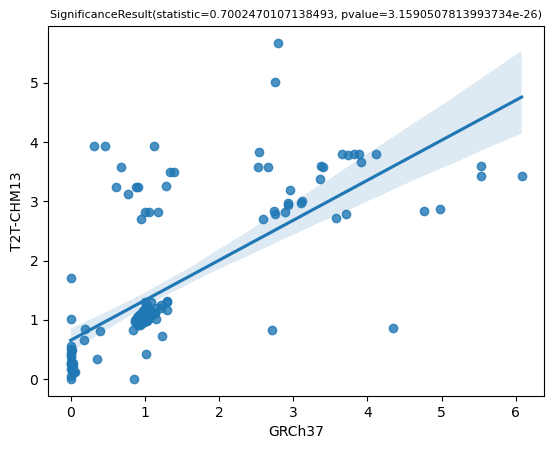

In [86]:
obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])



ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
plt.title(str(obtained), size=8)#'R=0.466853755220, pvalue=2.004517e-15)')
plt.savefig('../plots/cnvs_values_individual_assemblies_cnvnator.png', transparent=True)
plt.show()

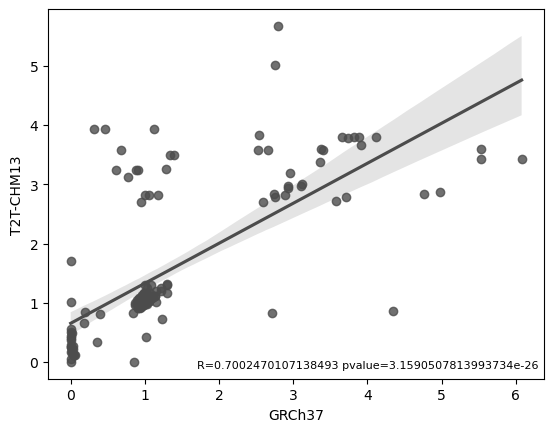

In [100]:
obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])



ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b", color=".3")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
plt.text(1.7,-0.1,('R='+ str(obtained.statistic) + ' pvalue=' + str(obtained.pvalue)), fontsize=8)
plt.savefig('../plots/cnvs_values_individual_assemblies_cnvnator.png', transparent=True)
plt.show()


#ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b", color=".3")
#ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')


<h2> Literature CNVs correlation

In [61]:
sudmant = pd.read_csv('/Users/luciabazan/Downloads/sudmant_data.csv')
sudmant = sudmant[['contig','start','end','AMR_Maya_HGDP00855_F']]
sudmant.columns =['Chromosome', 'Start', 'End', 'CNV_value']
sudmant = sudmant[sudmant['CNV_value'] != 2]
sudmant.to_csv('LP6005441-DNA_B10_grch37_sdumant.bed', index=False, header=False, sep='\t')
sudmant#.columns = ['Chromosome','Start','End','RD','assembly']

,Chromosome,Start,End,CNV_value
0,chr1,12048,177033,22
1,chr1,12048,89237,10
5,chr1,228416,267160,24
8,chr1,461963,471226,-1
9,chr1,471226,471326,10
...,...,...,...,...
14977,chrX,75525579,75617789,3
14989,chrX,84105273,84119490,3
15000,chrX,134749333,134807363,3
15004,chrX,29268810,29271507,3


In [62]:
t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
sample_t2t = t2t_cnvs_values[['Chromosome', 'Start','End','LP6005441-DNA_B10']]
sample_t2t = sample_t2t[sample_t2t['LP6005441-DNA_B10'] !=2 ]
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t.columns = ['Chromosome','Start','End','RD','assembly']
sample_t2t

,Chromosome,Start,End,RD,assembly
2562,chr1,436980,452948,6.0,T2T-CHM13
2565,chr1,472779,484339,1.0,T2T-CHM13
2569,chr1,518975,605035,1.0,T2T-CHM13
2570,chr1,607218,637514,3.0,T2T-CHM13
2577,chr1,700181,782637,1.0,T2T-CHM13
...,...,...,...,...,...
173194,chr18,75345932,75357953,1.0,T2T-CHM13
173201,chr18,75427252,75500588,1.0,T2T-CHM13
173218,chr18,75758430,75784864,1.0,T2T-CHM13
173224,chr18,75860194,75878406,1.0,T2T-CHM13


/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


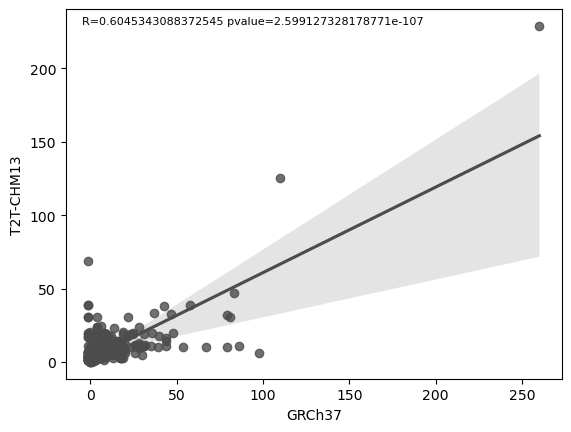

In [81]:
sample_grch37 = pd.read_csv('/Users/luciabazan/Downloads/sudmant_to_t2t.bed', header=None, sep='\t')
sample_grch37 = sample_grch37.drop(columns = 4)
sample_grch37.columns = list(sample_old.columns)
sample_grch37['assembly'] = 'GRCh37'
sample_grch37.columns = ['Chromosome','Start','End','RD','assembly']
sample_grch37

t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
sample_t2t = t2t_cnvs_values[['Chromosome', 'Start','End','LP6005441-DNA_B10']]
sample_t2t = sample_t2t[sample_t2t['LP6005441-DNA_B10'] !=2 ]
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t.columns = ['Chromosome','Start','End','RD','assembly']
sample_t2t

sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_grch37)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]
grch37_to_t2tchm13


obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])
obtained

ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b", color=".3")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
plt.text(-5,230,('R='+ str(obtained.statistic) + ' pvalue=' + str(obtained.pvalue)), fontsize=8)
plt.savefig('../plots/cnvs_values_individual_assemblies_literature.png', transparent=True)
plt.show()

0.6045343088372545

<h2> CNVnator old with T2T genome browser 

/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


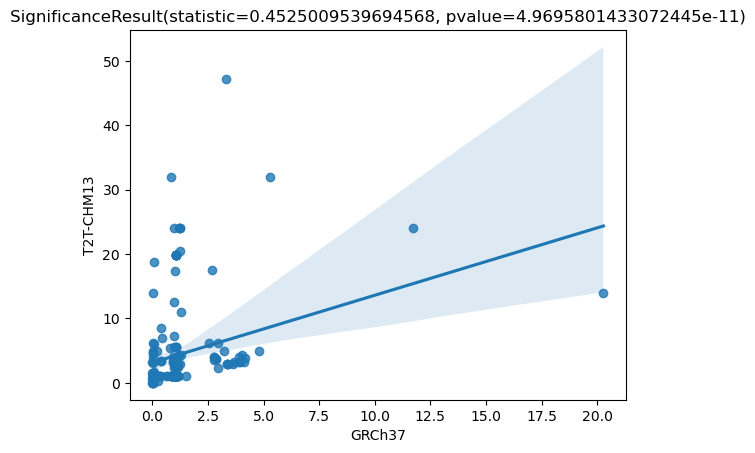

In [64]:
sample_grch37 = pd.read_csv('/Users/luciabazan/Downloads/sample_old_to_new.bed', header=None, sep='\t')
sample_grch37 = sample_grch37.drop(columns = 4)
sample_grch37.columns = list(sample_old.columns)
sample_grch37['assembly'] = 'GRCh37'
sample_grch37

t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
sample_t2t = t2t_cnvs_values[['Chromosome', 'Start','End','LP6005441-DNA_B10']]
sample_t2t = sample_t2t[sample_t2t['LP6005441-DNA_B10'] !=2 ]
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t.columns = ['Chromosome','Start','End','RD','assembly']


sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_grch37)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]


##correlation
obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])
ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
plt.title(str(obtained))
#plt.savefig('../plots/cnvs_values_individual_assemblies.png', transparent=True)
plt.show()

<h2> CNVnator t2t with T2T genome browser 

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_53058/4181370261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_t2t_cnvnator['assembly'] = 'T2T-CHM13-CNVnator'
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/opt/anaconda3/lib/python3.11/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

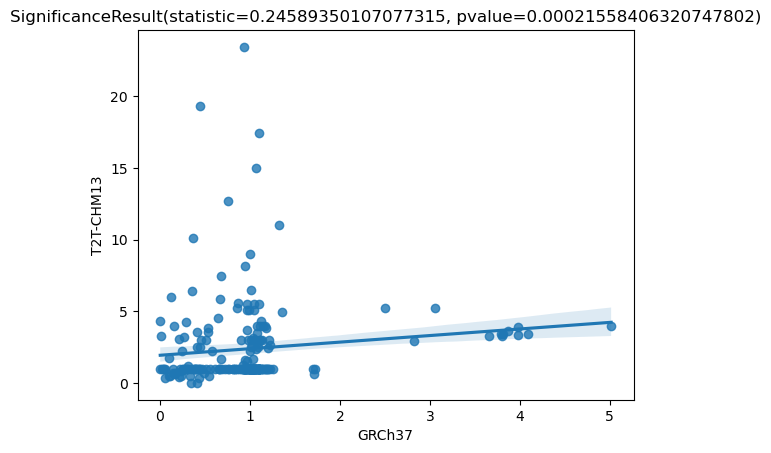

In [65]:
sample_t2t = pd.read_csv('/Users/luciabazan/output.tsv', sep='\t', header=None)
sample_t2t = sample_t2t[[3,4,5,7]]
sample_t2t.columns = list(sample_old.columns)
sample_t2t['RD'] = sample_t2t['RD'] * 2 
sample_t2t_cnvnator = sample_t2t[sample_t2t['Chromosome'] != 'chrM']
sample_t2t_cnvnator['assembly'] = 'T2T-CHM13-CNVnator'
sample_t2t_cnvnator

t2t_cnvs_values = pd.read_csv('../data/t2tchm13_cnvr_cnv_values.csv')
t2t_cnvs_values['Chromosome'] = 'chr' + t2t_cnvs_values['Chromosome'].astype(str)
sample_t2t = t2t_cnvs_values[['Chromosome', 'Start','End','LP6005441-DNA_B10']]
sample_t2t = sample_t2t[sample_t2t['LP6005441-DNA_B10'] !=2 ]
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t.columns = ['Chromosome','Start','End','RD','assembly']


sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_t2t_cnvnator)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]


##correlation
obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])
ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
plt.title(str(obtained))
#plt.savefig('../plots/cnvs_values_individual_assemblies.png', transparent=True)
plt.show()